In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statistics

In [2]:
#Przygotowanie danych do backtestingu
pre = pd.read_csv("C:/Users/DAMIANEK/Desktop/Studia/copper.csv")
pre

,Close/Last,Volume,Open,High,Low
0,4.1065,98124,4.1285,4.1955,4.0950
1,4.1240,88437,4.0700,4.1430,4.0535
2,4.0810,88325,4.0295,4.0880,3.9840
3,4.0195,81243,3.9870,4.0540,3.9780
4,3.9765,53745,4.0180,4.0395,3.9630
...,...,...,...,...,...
1255,3.1555,33960,3.1490,3.1685,3.1275
1256,3.1540,37634,3.1835,3.2180,3.1350
1257,3.1815,51721,3.1100,3.2015,3.0995
1258,3.0795,88784,3.0835,3.1020,3.0545


In [3]:
pre1 = pre.to_numpy()
pre1

array([[4.10650e+00, 9.81240e+04, 4.12850e+00, 4.19550e+00, 4.09500e+00],
       [4.12400e+00, 8.84370e+04, 4.07000e+00, 4.14300e+00, 4.05350e+00],
       [4.08100e+00, 8.83250e+04, 4.02950e+00, 4.08800e+00, 3.98400e+00],
       ...,
       [3.18150e+00, 5.17210e+04, 3.11000e+00, 3.20150e+00, 3.09950e+00],
       [3.07950e+00, 8.87840e+04, 3.08350e+00, 3.10200e+00, 3.05450e+00],
       [3.09550e+00, 1.03418e+05, 3.06450e+00, 3.11700e+00, 3.04400e+00]])

In [36]:
data = []
for i in range(1260):
    data.append(pre1[i][2])
    
data_rvs = data[::-1]

In [19]:
#Backtesting dla cen miedzi - kwantyle
def copper_backtesting(alpha):
    def testing(a, alpha):
        X = data_rvs[a:629+a]
        r = data_rvs[630+a]
        k = np.quantile(X, alpha)
        if k > r:
            j = 1
        if k < r:
            j = 0
        return j
    counts = []
    i = 0
    while i <= 629:
        value = testing(i, alpha)
        counts.append(value)
        i += 1
    EX = statistics.mean(counts)
    VarX = statistics.variance(counts)
    print("Backtesting dla alpha = " + str(alpha))
    print("Teoretyczna wartość oczekiwana: " + str(alpha))
    print("Rzeczywista wartość oczekiwana: " + str(EX))
    print("Teoretyczna wariancja: " + str(alpha * (1-alpha)))
    print("Rzeczywista wariancja: " + str(VarX))
    
def copper_backtesting_num(alpha):
    counts = []
    i = 0
    while i <= 629:
        X = data_rvs[i:629+i]
        r = data_rvs[630+i]
        k = np.quantile(X, alpha)
        if k > r:
            j = 1
        elif k < r:
            j = 0
        else:
            pass
        counts.append(j)
        i += 1
    EX = statistics.mean(counts)
    VarX = statistics.variance(counts)
    return [EX, VarX]

In [20]:
copper_backtesting(0.001)

Backtesting dla alpha = 0.001
Teoretyczna wartość oczekiwana: 0.001
Rzeczywista wartość oczekiwana: 0
Teoretyczna wariancja: 0.000999
Rzeczywista wariancja: 0


In [21]:
X = np.linspace(0,1,1000)
X1, X2 = [], []
for x in X:
    X1.append(copper_backtesting_num(x)[0])
    X2.append(copper_backtesting_num(x)[1])

In [22]:
Y = []
for x in X:
    Y.append(x * (1-x))

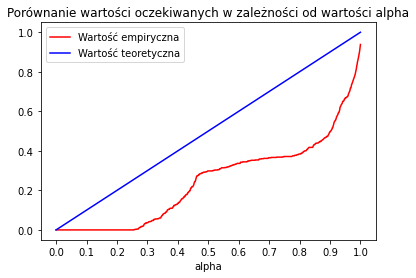

In [48]:
plt.plot(X,X1,color="r",label="Wartość empiryczna")
plt.plot(X,X,color="b",label="Wartość teoretyczna")
plt.xticks(ticks = np.linspace(0,1,11))
plt.title("Porównanie wartości oczekiwanych w zależności od wartości alpha")
plt.xlabel("alpha")
plt.legend(loc="best")
plt.show()

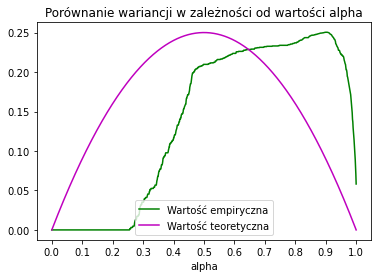

In [49]:
plt.plot(X,X2,color="g",label="Wartość empiryczna")
plt.plot(X,Y,color="m",label="Wartość teoretyczna")
plt.xticks(ticks = np.linspace(0,1,11))
plt.title("Porównanie wariancji w zależności od wartości alpha")
plt.xlabel("alpha")
plt.legend(loc="best")
plt.show()

In [30]:
def copper_backtesting_02(alpha):
    counts = []
    i = 0
    while i <= 1131:
        X = data_rvs[i:126+i]
        r = data_rvs[127+i]
        k = np.quantile(X, alpha)
        if k > r:
            j = 1
        elif k < r:
            j = 0
        else:
            pass
        counts.append(j)
        i += 1
    EX = statistics.mean(counts)
    VarX = statistics.variance(counts)
    return [EX, VarX]

In [31]:
x1, x2 = [], []
for x in X:
    x1.append(copper_backtesting_02(x)[0])
    x2.append(copper_backtesting_02(x)[1])

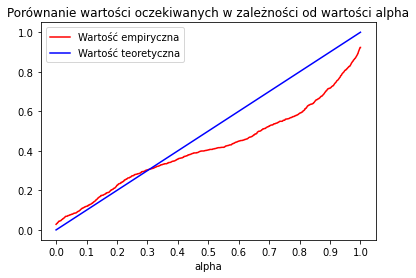

In [51]:
plt.plot(X,x1,color="r",label="Wartość empiryczna")
plt.plot(X,X,color="b",label="Wartość teoretyczna")
plt.xticks(ticks = np.linspace(0,1,11))
plt.title("Porównanie wartości oczekiwanych w zależności od wartości alpha")
plt.xlabel("alpha")
plt.legend(loc="best")
plt.show()

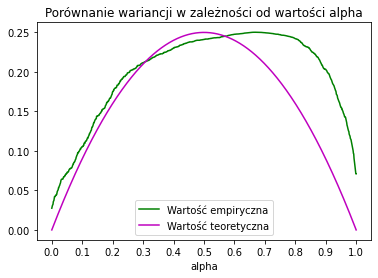

In [52]:
plt.plot(X,x2,color="g",label="Wartość empiryczna")
plt.plot(X,Y,color="m",label="Wartość teoretyczna")
plt.xticks(ticks = np.linspace(0,1,11))
plt.title("Porównanie wariancji w zależności od wartości alpha")
plt.xlabel("alpha")
plt.legend(loc="best")
plt.show()

In [39]:
def copper_backtesting_04(alpha):
    counts = []
    i = 0
    while i <= 1005:
        X = data_rvs[i:252+i]
        r = data_rvs[253+i]
        k = np.quantile(X, alpha)
        if k > r:
            j = 1
        elif k < r:
            j = 0
        else:
            pass
        counts.append(j)
        i += 1
    EX = statistics.mean(counts)
    VarX = statistics.variance(counts)
    return [EX, VarX]

In [40]:
y1, y2 = [], []
for x in X:
    y1.append(copper_backtesting_04(x)[0])
    y2.append(copper_backtesting_04(x)[1])

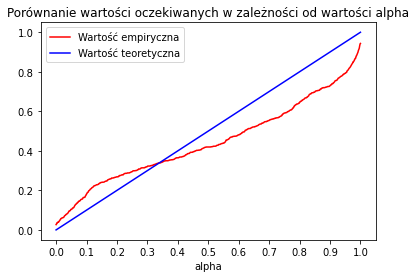

In [53]:
plt.plot(X,y1,color="r",label="Wartość empiryczna")
plt.plot(X,X,color="b",label="Wartość teoretyczna")
plt.xticks(ticks = np.linspace(0,1,11))
plt.title("Porównanie wartości oczekiwanych w zależności od wartości alpha")
plt.xlabel("alpha")
plt.legend(loc="best")
plt.show()

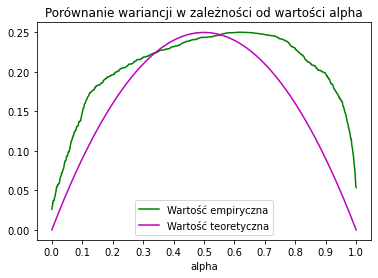

In [54]:
plt.plot(X,y2,color="g",label="Wartość empiryczna")
plt.plot(X,Y,color="m",label="Wartość teoretyczna")
plt.xticks(ticks = np.linspace(0,1,11))
plt.title("Porównanie wariancji w zależności od wartości alpha")
plt.xlabel("alpha")
plt.legend(loc="best")
plt.show()

In [59]:
def copper_backtesting_06(alpha):
    counts = []
    i = 0
    while i <= 879:
        X = data_rvs[i:378+i]
        r = data_rvs[379+i]
        k = np.quantile(X, alpha)
        if k > r:
            j = 1
        elif k < r:
            j = 0
        else:
            pass
        counts.append(j)
        i += 1
    EX = statistics.mean(counts)
    VarX = statistics.variance(counts)
    return [EX, VarX]

In [60]:
z1, z2 = [], []
for x in X:
    z1.append(copper_backtesting_06(x)[0])
    z2.append(copper_backtesting_06(x)[1])

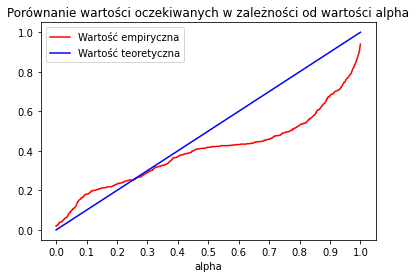

In [61]:
plt.plot(X,z1,color="r",label="Wartość empiryczna")
plt.plot(X,X,color="b",label="Wartość teoretyczna")
plt.xticks(ticks = np.linspace(0,1,11))
plt.title("Porównanie wartości oczekiwanych w zależności od wartości alpha")
plt.xlabel("alpha")
plt.legend(loc="best")
plt.show()

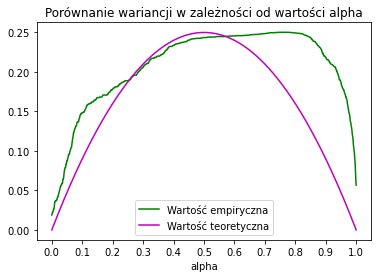

In [62]:
plt.plot(X,z2,color="g",label="Wartość empiryczna")
plt.plot(X,Y,color="m",label="Wartość teoretyczna")
plt.xticks(ticks = np.linspace(0,1,11))
plt.title("Porównanie wariancji w zależności od wartości alpha")
plt.xlabel("alpha")
plt.legend(loc="best")
plt.show()

In [64]:
def copper_backtesting_08(alpha):
    counts = []
    i = 0
    while i <= 753:
        X = data_rvs[i:504+i]
        r = data_rvs[505+i]
        k = np.quantile(X, alpha)
        if k > r:
            j = 1
        elif k < r:
            j = 0
        else:
            pass
        counts.append(j)
        i += 1
    EX = statistics.mean(counts)
    VarX = statistics.variance(counts)
    return [EX, VarX]

In [ ]:
a1, a2 = [], []
for x in X:
    a1.append(copper_backtesting_08(x)[0])
    a2.append(copper_backtesting_08(x)[1])

In [ ]:
plt.plot(X,a1,color="r",label="Wartość empiryczna")
plt.plot(X,X,color="b",label="Wartość teoretyczna")
plt.xticks(ticks = np.linspace(0,1,11))
plt.title("Porównanie wartości oczekiwanych w zależności od wartości alpha")
plt.xlabel("alpha")
plt.legend(loc="best")
plt.show()

In [ ]:
plt.plot(X,a2,color="g",label="Wartość empiryczna")
plt.plot(X,Y,color="m",label="Wartość teoretyczna")
plt.xticks(ticks = np.linspace(0,1,11))
plt.title("Porównanie wariancji w zależności od wartości alpha")
plt.xlabel("alpha")
plt.legend(loc="best")
plt.show()